<div style="border-radius:15px; padding: 15px; background-color: #025E73; font-size:80%; text-align:right; width: 95%;">

<h2 align="left"><font color=#ff6200>Analyzing Healthcare Accessibility and Demographic Disparities in Nairobi</font></h2>

<h2 align="left"><font color=#ff6200>by Ronald Ongori Nyagaka</font></h2>
`

<img src="https://www.sandiego.edu/uploads/fe8d6081d12556f3873af3b9e0c6c9db.jpg" length="2700">

<div style="border-radius:15px; padding: 15px; background-color: #025E73; font-size:110%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>PROBLEM STATEMENT:</font></h2>

Despite the global commitment to Sustainable Development Goal (SDG) 3, which aims to ensure healthy lives and promote well-being for all at all ages, KENYA faces substantial challenges in achieving universal health coverage. With disparities in healthcare accessibility, demographic health variances, and systemic limitations, a comprehensive understanding of the current state of healthcare services in relation to the population's needs is critical. There is an imperative need to analyze the distribution and capacity of healthcare facilities across KENYA's diverse socio-demographic landscape to identify gaps and opportunities for targeted improvements.


<div style="border-radius:15px; padding: 15px; background-color: #025E73; font-size:110%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Objectives:</font></h2>


1. Assessment of Healthcare Facility Distribution:
      * To evaluate the spatial distribution of healthcare facilities in Nairobi and determine their accessibility across different demographics.
  
2. Demographic and Health Profile Analysis:
      * To analyze demographic data from the 2019 Kenya Population and Housing Census for Nairobi to understand population dynamics and potential healthcare demands.
  
3. Correlation Analysis:
      * To investigate the relationship between the location of healthcare facilities and various demographic factors such as population density, age distribution, gender, and socio-economic status.


<a id="setup"></a>
# <p style="background-color: #F28888; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:20px 70px;">Step 1 | Setup and Initialization</p>


In [190]:
# Here I first imported necessary libraries for the analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
%matplotlib inline
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
## <h2><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#F28888'> Loading the Dataset</span></h2>


In [66]:
# Detect encoding

with open('ehealth-kenya-facilities-download-21102015.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Loading the dataset
health_df = pd.read_csv('ehealth-kenya-facilities-download-21102015.csv', encoding=encoding)

# viewing first five rows

health_df.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# getting shape of the health data

health_df.shape

(10505, 50)

In [144]:
# Detect encoding

with open('Population-households-density-by-sub-county.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Loading the dataset
population = pd.read_csv('Population-households-density-by-sub-county.csv', encoding=encoding)

# viewing first five rows

population.head()

,Subcounty,Total,Male,Female,HouseHolds Total,Households Conventional,Group quarters,Land Area Sq. Km,Persons Per Sq. Km
0,DAGORETTI,"434,208","217,651","216,526","155,089","154,949",140,29,"14,908"
1,EMBAKASI,"988,808","492,476","496,270","347,955","346,462","1,493",86,"11,460"
2,KAMUKUNJI,"268,276","136,670","131,599","84,365","83,680",685,11,"25,455"
3,KASARANI,"780,656","381,234","399,385","271,290","268,611","2,679",86,"9,063"
4,KIBRA,"185,777","94,199","91,569","61,690","61,651",39,12,"15,311"


In [69]:
# getting shape population data

population.shape

(11, 9)

<a id="Preliminary"></a>
# <p style="background-color: #F28888; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:20px 70px;;">Step 2 | Preliminary Data Analysis</p>


In [70]:
# viewing basic info of the health data set

health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observations:</font></h2>

* There appear to be some missing values
* A mixture of floats and objects as data types, meaning there is some categorical data

In [71]:
# viewing basic info of the health data set

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    Subcounty                 11 non-null     object
 1    Total                     11 non-null     object
 2    Male                      11 non-null     object
 3    Female                    11 non-null     object
 4     HouseHolds Total         11 non-null     object
 5    Households Conventional   11 non-null     object
 6    Group quarters            11 non-null     object
 7    Land Area Sq. Km          11 non-null     int64 
 8    Persons Per Sq. Km        11 non-null     object
dtypes: int64(1), object(8)
memory usage: 924.0+ bytes


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observations:</font></h2>

* There are no missing values
* A mixture of floats and objects as data types, meaning there is some categorical data that should be converted to integers

In [72]:
# Summary statistics for numerical variables

health_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Facility Code,10505.0,1.572671e+04,3.246325e+03,10001.0,12957.0,15702.0,18569.0,2.128100e+04
Beds,10418.0,5.432905e+00,2.986266e+01,0.0,0.0,0.0,1.0,1.455000e+03
Cots,10428.0,7.443422e-01,1.133202e+01,0.0,0.0,0.0,0.0,1.000000e+03
Official Alternate No,952.0,6.695277e+08,5.568178e+08,0.0,713896212.5,722769243.5,727898129.0,7.382217e+09
ANC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEOC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAES SEC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEOC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPI,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observations:</font></h2>

- **Beds:**
  - There are 10,418 entries for the number of beds.
  - The mean number of beds per facility is approximately 5.43.
  - The standard deviation is about 29.87, which is quite high relative to the mean, suggesting variability in the number of beds across facilities.
  - The minimum number of beds is 0, indicating that some facilities have no beds.

- **Cots:**
  - The data for cots is available for 10,428 facilities.
  - On average, there are about 0.74 cots per facility.
  - The distribution of cots is also highly variable with a standard deviation of approximately 1.13.
  - Similar to beds, the minimum number of cots is 0, but the maximum is much higher at 10,000, suggesting the presence of outliers or data entry errors.


In [73]:
# Summary statistics for numerical variables

population.describe().T

,count,mean,std,min,25%,50%,75%,max
Land Area Sq. Km,11.0,64.090909,67.008141,3.0,12.0,29.0,92.0,217.0


<a id="Data_Cleaning"></a>
# <p style="background-color: #F28888; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Data Cleaning and Transformation</p>


<a id="missing_values"></a>
## <h2><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#F28888'> Missing Values</span></h2>


In [74]:
# Calculating the percentage of missing values for each column

def missing(dataset):
    missing_data = dataset.isnull().sum()
    missing_percentage = (missing_data[missing_data > 0] / dataset.shape[0]) * 100
    return missing_percentage

missing(health_df)

Division                     2.541647
Location                     4.712042
Sub Location                 8.491195
Description of Location     49.509757
Nearest Town                 5.730604
Beds                         0.828177
Cots                         0.732984
Official Landline           86.987149
Official Fax                94.859591
Official Mobile             72.251309
Official Email              82.322703
Official Address            32.917658
Official Alternate No       90.937649
Town                        25.387911
Post Code                   36.411233
In Charge                   20.371252
Job Title of in Charge      29.500238
Open 24 Hours                4.255117
Open Weekends                4.350309
ANC                        100.000000
ART                         91.232746
BEOC                       100.000000
BLOOD                      100.000000
CAES SEC                   100.000000
CEOC                       100.000000
C-IMCI                      88.795812
EPI         

In [75]:
# dropping columns deemed unnecessary for our analysis

columns_to_drop = ['Official Landline', 'Official Fax','Official Mobile','Official Email', 'Official Address', 'Official Alternate No', 
                   'Post Code', 'HCT', 'OPD','OUTREACH','PMTCT',
                   'RAD/XRAY','RHTC/RHDC', 'TB DIAG','TB LABS','TB TREAT','YOUTH','GROWM','EPI', 'ANC', 'ART',  'BEOC',  'BLOOD',  'CAES SEC','CEOC' ]

health_df.drop(columns_to_drop, axis =1, inplace = True)

In [76]:
missing(health_df)

Division                    2.541647
Location                    4.712042
Sub Location                8.491195
Description of Location    49.509757
Nearest Town                5.730604
Beds                        0.828177
Cots                        0.732984
Town                       25.387911
In Charge                  20.371252
Job Title of in Charge     29.500238
Open 24 Hours               4.255117
Open Weekends               4.350309
C-IMCI                     88.795812
FP                         59.181342
HBC                        73.365064
IPD                        62.465493
dtype: float64

In [77]:
# Dealing with missing values per columns

def fill_na(columns, value, df):
    values = {columns: value}
    df.fillna(value=values, inplace=True)


fill_na('Division', 'Unspecified',health_df)
fill_na('Location', 'Unspecified',health_df)
fill_na('Sub Location', 'Unspecified',health_df)
fill_na('Description of Location', 'Unspecified',health_df)
fill_na('Nearest Town', 'Unspecified',health_df)
fill_na('In Charge', 'Unspecified',health_df)
fill_na('Town', 'Unspecified',health_df)
fill_na('Job Title of in Charge', 'Unspecified',health_df)
fill_na('Open 24 Hours', 'Unspecified',health_df)
fill_na('Open Weekends', 'Unspecified',health_df)


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Criteria for dropping columns </font></h2>

* The columns below, should have values Y and N,but we can not assume that the missing values are automatically "N"
* For Beds and Cots I will use the County mean to do a fillna since there are still missing values at other levels of location split

In [78]:
# dropping the remaining columns

columns_to_drop = ['C-IMCI','FP','HBC','IPD' ]

health_df.drop(columns_to_drop, axis =1, inplace = True)



In [79]:
# Here I Calculated the mean number of beds per County and filled NaN values with that mean

health_df['Beds'] = health_df.groupby('County')['Beds'].transform(lambda x: x.fillna(x.mean()))
health_df['Cots'] = health_df.groupby('County')['Cots'].transform(lambda x: x.fillna(x.mean()))



In [80]:
# checking for missing values

missing(health_df)

Series([], dtype: float64)

In [81]:
# Here I checked for missing values for population dataset

missing(population)

Series([], dtype: float64)

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

* There are no missing values in both health  and population dataset

<a id="Duplicates"></a>
## <h2><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#F28888'> Duplicates</span></h2>

In [82]:
# here I checked for duplicates in health dataset

health_df.duplicated().sum()

0

In [83]:
# here I checked for duplicates in population dataset

population.duplicated().sum()

0

<a id="Data set transformation"></a>
## <h2><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#F28888'> Data set transformation</span></h2>

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Direction</font></h2>

* The analysis is centred to Nairobi hence I will filter only Nairobi related rows

In [84]:
# Finding best column to do this

health_df.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,Constituency,Nearest Town,Beds,Cots,Town,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,MANYATTA,Kiriari -market,0.0,0.0,148,Catherine Njoki Mugo,Nursing Officer in Charge,Unspecified,Unspecified,Operational
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,MATHARE,Kariobangi Market,0.0,0.0,Unspecified,Caroline Achieng,Clinical Officer,N,Y,Operational
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,LAIKIPIA EAST,Nanyuki,0.0,0.0,Unspecified,Cpt Kiplagat,Medical Superintendant,N,N,Operational
3,17486,12 Engineers,Central,Kiambu,Thika West,Unspecified,Dispensary,Ministry of Health,Unspecified,Unspecified,...,JUJA,Unspecified,0.0,0.0,Unspecified,Unspecified,Unspecified,N,N,Operational
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,KAJIADO NORTH,Ongata Ronga,7.0,0.0,Langata,Jeffrey Mikombi Akide,Clinical Officer,Y,Y,Operational


In [85]:
# confirming the province column is the most appropriate

health_df['Province'].value_counts()

Province
Rift Valley      2729
Eastern          2027
Central          1643
Nyanza           1158
Nairobi           942
Coast             913
Western           681
North Eastern     412
Name: count, dtype: int64

In [86]:
# Narrowing to the Nairobi related rows in the dataset and creating a new dataframe

Nbo_health_df = health_df[health_df['Province'] == 'Nairobi']

# should be 942

Nbo_health_df.shape

(942, 21)

In [91]:
# Here I removed all unwanted symbols and characters

for column in Nbo_health_df.select_dtypes(include='object').columns:
    Nbo_health_df.loc[:, column] = Nbo_health_df.loc[:, column].str.replace("[^a-zA-Z0-9 ]", "", regex=True)


In [96]:
# Here I converted all strings to lower for uniformity

Nbo_health_df= Nbo_health_df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

Nbo_health_df.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,Constituency,Nearest Town,Beds,Cots,Town,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status
1,19310,st judes huruma community health services,nairobi,nairobi,mathare,huruma,medical clinic,private practice unspecified,huruma,huruma,...,mathare,kariobangi market,0.0,0.0,unspecified,caroline achieng,clinical officer,n,y,operational
7,13043,7kr mrs health centre,nairobi,nairobi,langata,langata,health centre,armed forces,mugumoini,mugumoini,...,langata,langata shopping center,14.0,0.0,nairobi,captain murunga,nursing officer in charge,y,y,operational
10,20346,aar adams health centre,nairobi,nairobi,kibra,woodly,medical clinic,private practice general practitioner,woodly,woodly,...,kibra,adams,0.0,0.0,nairobi,dr mbuthia wacera,medical superintendant,n,y,operational
11,12861,aar city centre clinic,nairobi,nairobi,starehe,starehe,medical clinic,private enterprise institution,central business district,unspecified,...,starehe,nairobi,0.0,0.0,nairobi,dr alma okudo,doctor in charge,n,y,operational
12,16796,aar clinic sarit centre westlands,nairobi,nairobi,westlands,parklands,medical clinic,private enterprise institution,parklands,upper parklands,...,westlands,nairobi,0.0,0.0,unspecified,unspecified,nursing officer in charge,n,n,operational


In [106]:
# stripping spaces from column names


Nbo_health_df.columns = Nbo_health_df.columns.str.strip()

# filling empty space in column  names with the "_"

Nbo_health_df.columns = Nbo_health_df.columns.str.replace(" ", "_")

Nbo_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility_Code            942 non-null    int64  
 1   Facility_Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 942 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 942 non-null    object 
 9   Sub_Location             942 non-null    object 
 10  Description_of_Location  942 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest_Town             942 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                     942 

In [101]:
# confirming the dtypes of population dataset

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subcounty                 11 non-null     object
 1    Total                    11 non-null     object
 2    Male                     11 non-null     object
 3    Female                   11 non-null     object
 4   HouseHolds Total          11 non-null     object
 5   Households Conventional   11 non-null     object
 6   Group quarters            11 non-null     object
 7   Land Area Sq. Km          11 non-null     int64 
 8   Persons Per Sq. Km        11 non-null     object
dtypes: int64(1), object(8)
memory usage: 924.0+ bytes


In [145]:
# stripping spaces from column names

population.columns = population.columns.str.strip()

# filling empty space in column  names with the "_"

population.columns = population.columns.str.replace(" ", "_")

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Subcounty                11 non-null     object
 1   Total                    11 non-null     object
 2   Male                     11 non-null     object
 3   Female                   11 non-null     object
 4   HouseHolds_Total         11 non-null     object
 5   Households_Conventional  11 non-null     object
 6   Group_quarters           11 non-null     object
 7   Land_Area_Sq._Km         11 non-null     int64 
 8   Persons_Per_Sq._Km       11 non-null     object
dtypes: int64(1), object(8)
memory usage: 924.0+ bytes


In [150]:
# Here I removed all unwanted symbols and characters

for column in population.select_dtypes(include='object').columns:
    population.loc[:, column] = population.loc[:, column].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
    
population

,Subcounty,Total,Male,Female,HouseHolds_Total,Households_Conventional,Group_quarters,Land_Area_Sq._Km,Persons_Per_Sq._Km
0,DAGORETTI,434208,217651,216526,155089,154949,140,29,14908
1,EMBAKASI,988808,492476,496270,347955,346462,1493,86,11460
2,KAMUKUNJI,268276,136670,131599,84365,83680,685,11,25455
3,KASARANI,780656,381234,399385,271290,268611,2679,86,9063
4,KIBRA,185777,94199,91569,61690,61651,39,12,15311
5,LANGATA,197489,96698,100774,62239,60187,2052,217,911
6,MAKADARA,189536,96369,93157,70361,70080,281,12,16150
7,MATHARE,206564,106522,100028,74967,74967,,3,68940
8,NJIRU,626482,307642,318809,204563,204492,71,130,4821
9,STAREHE,210423,109173,101238,69389,66108,3281,21,10205


In [256]:
# stripping any empty spaces between strings

population['Subcounty']= population['Subcounty'].str.strip()


In [153]:
# changing numeric columns to integers

columns_to_change = ['Total', 'Male', 'Female', 'HouseHolds_Total',
       'Households_Conventional', 'Land_Area_Sq._Km',
       'Persons_Per_Sq._Km']

for columns in columns_to_change:
    population[columns]=  population[columns].astype(int)

In [161]:
# changing the Group_quarters into integers

population['Group_quarters'] = pd.to_numeric(population['Group_quarters'], errors='coerce').astype('float64')

In [162]:
# handling the missing value

# Calculate the mean of the column excluding NaN values

column_mean = population['Group_quarters'].mean()

population['Group_quarters'].fillna(value=column_mean, inplace=True)


<a id="Hypothesis Analysis"></a>
# <p style="background-color: #F28888; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:30px 50px;">Step 4 | Hypothesis Formulation and Analysis</p>

<div style="border-radius:15px; padding: 15px; background-color: #025E73; font-size:110%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Hypothesis:</font></h2>


To align with Sustainable Development Goal (SDG) 3, which is to ensure healthy lives and promote well-being for all at all ages, hypotheses formulation for analyzing healthcare in Nairobi will cover several key areas:

### Accessibility of Healthcare Facilities
1. **Geographic Accessibility Hypothesis**: "Healthcare facilities may not equitably distributed across Nairobi, leading to longer travel times and reduced access in lower-income neighborhoods."
2. **Service Range Accessibility Hypothesis**: "The range of services offered by healthcare facilities in Nairobi may varies significantly between districts, affecting the quality of care available to residents."

### Healthcare System Analysis
1. **Resource Allocation Hypothesis**: "The current allocation of medical resources and personnel across Nairobi’s healthcare facilities does not match the demographic health profiles of the regions they serve."
2. **Impact of Household Size Hypothesis**: "Large household sizes in Nairobi correlate with increased pressure on healthcare facilities, suggesting the need for a strategic expansion of healthcare resources in densely populated areas."


<a id="Accessibility of Healthcare Facilities"></a>
### <h2><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#F28888'> Accessibility of Healthcare Facilities</span></h2>

In [301]:
# Lets merge the datasets to get valuable insights

# first step is copy and group what we have

geo_data = Nbo_health_df.copy()

geo_data = geo_data[geo_data['Operational_Status']== 'operational']

# grouping data by Constituency and getting the count

grouped_data = geo_data.groupby(['Constituency']).size().reset_index(name='Count')

# Dictionary of words to be replaced with an empty string

directions_to_remove = {" north": "", " south": "", " east": "", " west": "", " central": ""}

grouped_data['Constituency'] = grouped_data['Constituency'].replace(directions_to_remove, regex=True)

# changing to upper 

grouped_data['Constituency']= grouped_data['Constituency'].str.upper()

grouped_data['Constituency']= grouped_data['Constituency'].str.strip()


# grouping the dataset again

grouped_data = grouped_data.groupby(['Constituency'])['Count'].sum().reset_index(name='Count')

# renaming the column 

grouped_data.rename(columns={"Constituency" : "Subcounty"}, inplace= True)


# merging the the data
geo_merged = pd.merge(grouped_data, population, on='Subcounty', how='inner')

geo_merged

,Subcounty,Count,Total,Male,Female,HouseHolds_Total,Households_Conventional,Group_quarters,Land_Area_Sq._Km,Persons_Per_Sq._Km
0,DAGORETTI,105,434208,217651,216526,155089,154949,140.0,29,14908
1,EMBAKASI,145,988808,492476,496270,347955,346462,1493.0,86,11460
2,KAMUKUNJI,59,268276,136670,131599,84365,83680,685.0,11,25455
3,KASARANI,67,780656,381234,399385,271290,268611,2679.0,86,9063
4,KIBRA,81,185777,94199,91569,61690,61651,39.0,12,15311
5,LANGATA,68,197489,96698,100774,62239,60187,2052.0,217,911
6,MAKADARA,51,189536,96369,93157,70361,70080,281.0,12,16150
7,MATHARE,16,206564,106522,100028,74967,74967,1221.2,3,68940
8,STAREHE,137,210423,109173,101238,69389,66108,3281.0,21,10205
9,WESTLANDS,71,308854,153818,155021,104980,103489,1491.0,98,3167


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Facilities by Constituency and Operational Status</font></h2>



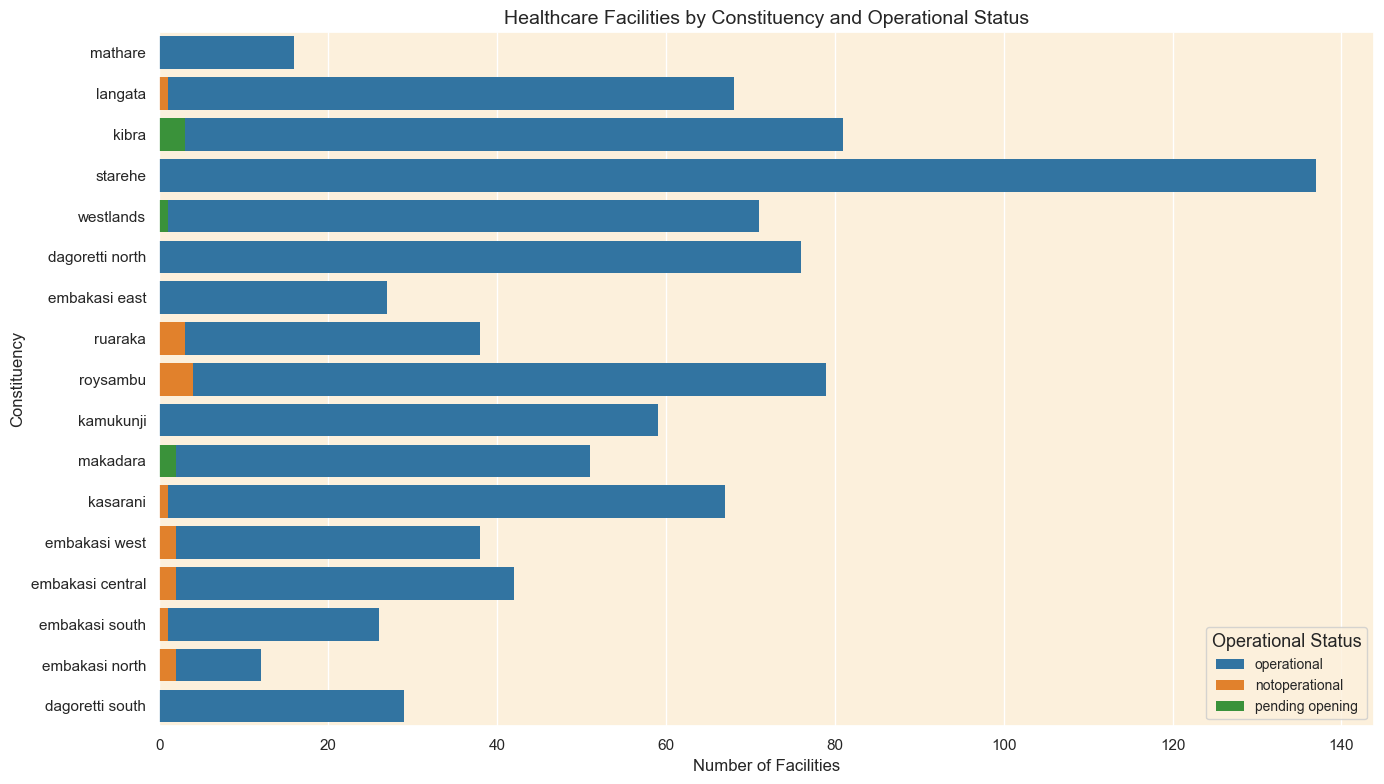

In [261]:
# Adjusting the bar width in the count plot to make the bars thicker.

plt.figure(figsize=(14, 8))  # Increase figure size for better readability
sns.countplot(data=Nbo_health_df, y='Constituency', hue='Operational_Status', palette='tab10', linewidth=0, dodge=False)  # Thicker bars

# Increase the title font size
plt.title('Healthcare Facilities by Constituency and Operational Status', fontsize=14)

# Increase label font sizes for better readability
plt.ylabel('Constituency', fontsize=12)
plt.xlabel('Number of Facilities', fontsize=12)

# Improve the legend
plt.legend(title='Operational Status', fontsize=10, title_fontsize='13', loc='lower right')

# Adjust the plot layout to fit the figure size and prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

1. Kibra has the most significant number of healthcare facilities, predominantly in the 'pending opening' category.
2. Dagoretti North has the second-highest number of facilities, mostly 'operational'.
3. Starehe has the highest number of facilities that are operational with Embakasi North being the least
4. Roysambu has a number of facilities that are not operational, while Kibra has the most pending opening

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Facility Density Analysis</font></h2>

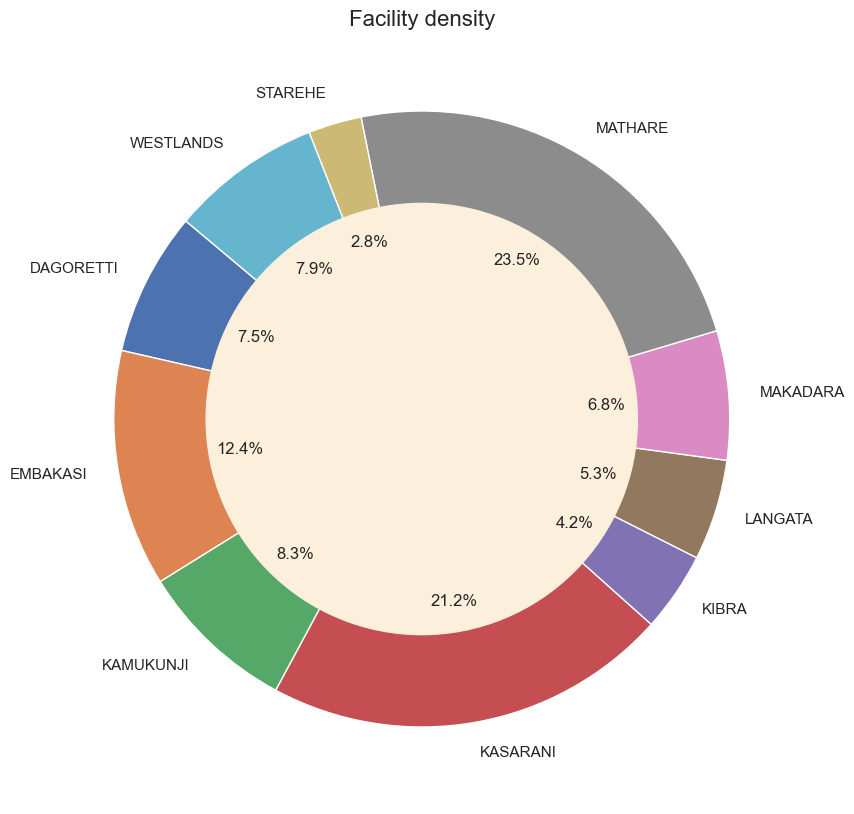

In [302]:
# Calculate the facility density

geo_merged['Facility_Density'] = geo_merged['Total'] /geo_merged['Count']

# Plotting the donut chart
plt.figure(figsize=(12, 10))
plt.pie(geo_merged['Facility_Density'], labels = geo_merged['Subcounty'], autopct='%1.1f%%', startangle=140)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='#fcf0dc'))

#title
plt.title('Facility density', fontsize=16)

# Display the plot
plt.show()

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>


1. **MATHARE's Challenge**: With a facility density of 23.5%, Mathare's single hospital serves the most people, indicating potential overcrowding and strained healthcare services.

2. **Variability in Access**: There's considerable variability in access to healthcare across subcounties, with Kasarani and Embakasi also showing high numbers of people per hospital, pointing to possible resource allocation issues.

3. **Healthcare Planning**: The data highlights critical areas for healthcare planning, with high-density subcounties like Mathare and Kasarani potentially needing more hospitals to meet demand.

3. **Potential for Improvement**: Moderate densities in Langata and Westlands suggest these areas have better healthcare accessibility but may still benefit from additional healthcare facilities as the population grows.

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Correlation Matrix for Healthcare Facility Count</font></h2>

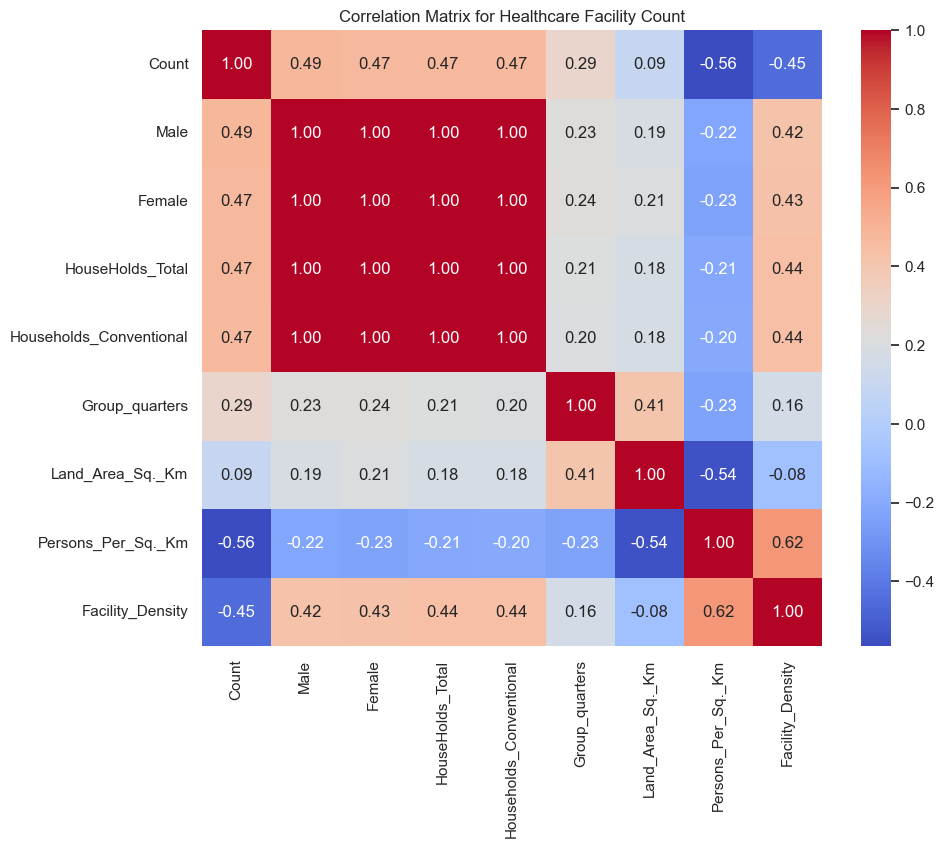

In [303]:
# Calculate the correlation matrix

correlation_matrix = geo_merged[['Count','Male','Female','HouseHolds_Total','Households_Conventional','Group_quarters','Land_Area_Sq._Km',	'Persons_Per_Sq._Km','Facility_Density']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Healthcare Facility Count')
plt.show()

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>


1. There is a moderate positive correlation between the count of facilities and the population metrics (Total, Male, Female, HouseHolds_Total, Households_Conventional). This suggests that as the population or the number of households increases, the number of healthcare facilities tends to increase as well.

2. The group quarters have a low positive correlation with the count of facilities, indicating that the presence of group quarters (like barracks, dormitories, etc.) is not a strong predictor of the number of facilities.

3. The correlation between land area and count of facilities is positive but weak, which implies that larger land areas do not necessarily have more healthcare facilities.

4. There is a negative correlation between persons per square kilometer (population density) and the count of facilities. This could indicate that areas with higher population density may not have a proportional increase in the number of facilities.

5. Facility density, defined as the number of facilities per person, shows a negative correlation with the count of facilities. This indicates that areas with a higher number of facilities tend to have a lower ratio of facilities per person, which could suggest that regions with more facilities might not necessarily have them due to high population density but perhaps due to better healthcare infrastructure or planning.



<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Population Demand Hypothesis</font></h2>

**Hypothesis Formulation**

* **Population Demand Hypothesis (H0):** There is no significant linear correlation between the total population of a subcounty and the number of healthcare facilities in that subcounty.

* **Alternative Hypothesis (H1):** There is a significant linear correlation between the total population of a subcounty and the number of healthcare facilities in that subcounty.

**Choice of Test**

* The Pearson correlation coefficient is a statistical measure of the strength of a linear relationship between two continuous variables. 
* It is appropriate when you want to check if increases in one variable correspond with increases (or decreases) in another variable. 
* In this case, since I are interested in understanding whether a larger population in a subcounty is associated with a higher number of healthcare facilities, Pearson's r is a suitable choice. 
* It will provide both the direction and the magnitude of the relationship.

In [304]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and the p-value
correlation_coef, p_value = stats.pearsonr(geo_merged['Total'], geo_merged['Count'])

# Display results
print(f"Pearson Correlation Coefficient (r): {correlation_coef:.3f}")
print(f"P-value: {p_value:.3f}")

# Check if we reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant linear relationship between population size and the number of healthcare facilities.")
else:
    print("We do not reject the null hypothesis. There is no significant linear relationship between population size and the number of healthcare facilities.")

Pearson Correlation Coefficient (r): 0.478
P-value: 0.163
We do not reject the null hypothesis. There is no significant linear relationship between population size and the number of healthcare facilities.


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

- The Pearson Correlation Coefficient of 0.478 indicates a moderate positive relationship between population size and the number of healthcare facilities.
- However, the p-value of 0.163 suggests that this finding is not statistically significant.
- This implies that while population size may influence the number of healthcare facilities, it's not a strong enough factor on its own to determine facility distribution.
- Other factors likely play a role as well.
- Therefore, the hypothesis that population size is the primary determinant of healthcare facility count is not supported by this analysis.

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Persons per sq km Hypothesis </font></h2>

**Hypothesis Formulation**

* **Persons per sq km Hypothesis (H0):** There is no significant linear correlation between the total Healthcare facilities of a subcounty and the Persons per sq km.

* **Alternative Hypothesis (H1):** There is a significant linear correlation between the total Healthcare facilities of a subcounty and the Persons per sq km.

**Choice of Test**

* **The Pearson correlation coefficient**

In [308]:
# Calculate the Pearson correlation coefficient and the p-value
correlation_coef, p_value = stats.pearsonr(geo_merged['Persons_Per_Sq._Km'], geo_merged['Count'])

# Display results
print(f"Pearson Correlation Coefficient (r): {correlation_coef:.3f}")
print(f"P-value: {p_value:.3f}")

# Check if we reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant linear relationship between Persons_Per_Sq._Km and the number of healthcare facilities.")
else:
    print("We do not reject the null hypothesis. There is no significant linear relationship between Persons_Per_Sq._Km	and the number of healthcare facilities.")

Pearson Correlation Coefficient (r): -0.565
P-value: 0.089
We do not reject the null hypothesis. There is no significant linear relationship between Persons_Per_Sq._Km	and the number of healthcare facilities.


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

- The Pearson Correlation Coefficient (r) of -0.565 indicates a moderate negative relationship between Persons_Per_Sq._Km and the number of healthcare facilities.
- However, the p-value of 0.089 suggests that this finding is not statistically significant.
- We do not reject the null hypothesis, indicating that there is no significant linear relationship between Persons_Per_Sq._Km and the number of healthcare facilities.
- This implies that population density, as measured by Persons_Per_Sq._Km, is not a strong predictor of the number of healthcare facilities in a given area.
- Other factors may have a stronger influence on healthcare facility distribution, and further investigation is warranted to identify these factors.

<a id="Healthcare System Resource Analysis"></a>
### <h2><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#F28888'> Healthcare System Resource Analysis</span></h2>

In [390]:
# First I will filter operational status "operational" for this analysis

res_data = Nbo_health_df.copy()

res_data = geo_data[geo_data['Operational_Status']== 'operational']

# convert the yes and no's to 1 and 0

res_data =  res_data.replace('y', 1)
res_data =  res_data.replace('n', 0)
res_data['Open_24_Hours'] =  res_data['Open_24_Hours'].replace('unspecified', 0)
res_data['Open_Weekends'] =  res_data['Open_Weekends'].replace('unspecified', 0)



# convert to int

res_data['Open_24_Hours']=  res_data['Open_24_Hours'].astype(int)
res_data['Open_Weekends']=  res_data['Open_Weekends'].astype(int)

# Dictionary of words to be replaced with an empty string

directions_to_remove = {" north": "", " south": "", " east": "", " west": "", " central": ""}

res_data['Constituency'] = res_data['Constituency'].replace(directions_to_remove, regex=True)

# group data by Constituency and other aggregate functions

res_data_grouped = res_data.groupby('Constituency').agg({'Beds': 'mean','Cots': 'mean','Open_24_Hours': 'sum' ,'Open_Weekends' :'sum'}).reset_index()

res_data_grouped = res_data_grouped.round(2)


# Dictionary of words to be replaced with an empty string

directions_to_remove = {" north": "", " south": "", " east": "", " west": "", " central": ""}

res_data_grouped['Constituency'] = res_data_grouped['Constituency'].replace(directions_to_remove, regex=True)

# changing to upper , stripping unnecessary spaces and changing column name

res_data_grouped['Constituency']= res_data_grouped['Constituency'].str.upper()

res_data_grouped['Constituency']= res_data_grouped['Constituency'].str.strip()

res_data_grouped.rename(columns={"Constituency" : "Subcounty"}, inplace= True)


# Merging the dataset 

res_data_merged = pd.merge(res_data_grouped, population, on='Subcounty', how='inner')

res_data_merged


,Subcounty,Beds,Cots,Open_24_Hours,Open_Weekends,Total,Male,Female,HouseHolds_Total,Households_Conventional,Group_quarters,Land_Area_Sq._Km,Persons_Per_Sq._Km
0,DAGORETTI,5.96,1.07,20,50,434208,217651,216526,155089,154949,140.0,29,14908
1,EMBAKASI,5.03,0.98,54,95,988808,492476,496270,347955,346462,1493.0,86,11460
2,KAMUKUNJI,18.36,3.49,18,34,268276,136670,131599,84365,83680,685.0,11,25455
3,KASARANI,3.24,0.37,9,37,780656,381234,399385,271290,268611,2679.0,86,9063
4,KIBRA,22.02,5.44,13,42,185777,94199,91569,61690,61651,39.0,12,15311
5,LANGATA,10.97,0.00,14,40,197489,96698,100774,62239,60187,2052.0,217,911
6,MAKADARA,3.82,0.37,14,30,189536,96369,93157,70361,70080,281.0,12,16150
7,MATHARE,45.62,0.00,3,9,206564,106522,100028,74967,74967,1221.2,3,68940
8,STAREHE,2.61,0.42,10,60,210423,109173,101238,69389,66108,3281.0,21,10205
9,WESTLANDS,8.92,0.45,27,45,308854,153818,155021,104980,103489,1491.0,98,3167


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Facilities Analysis</font></h2>



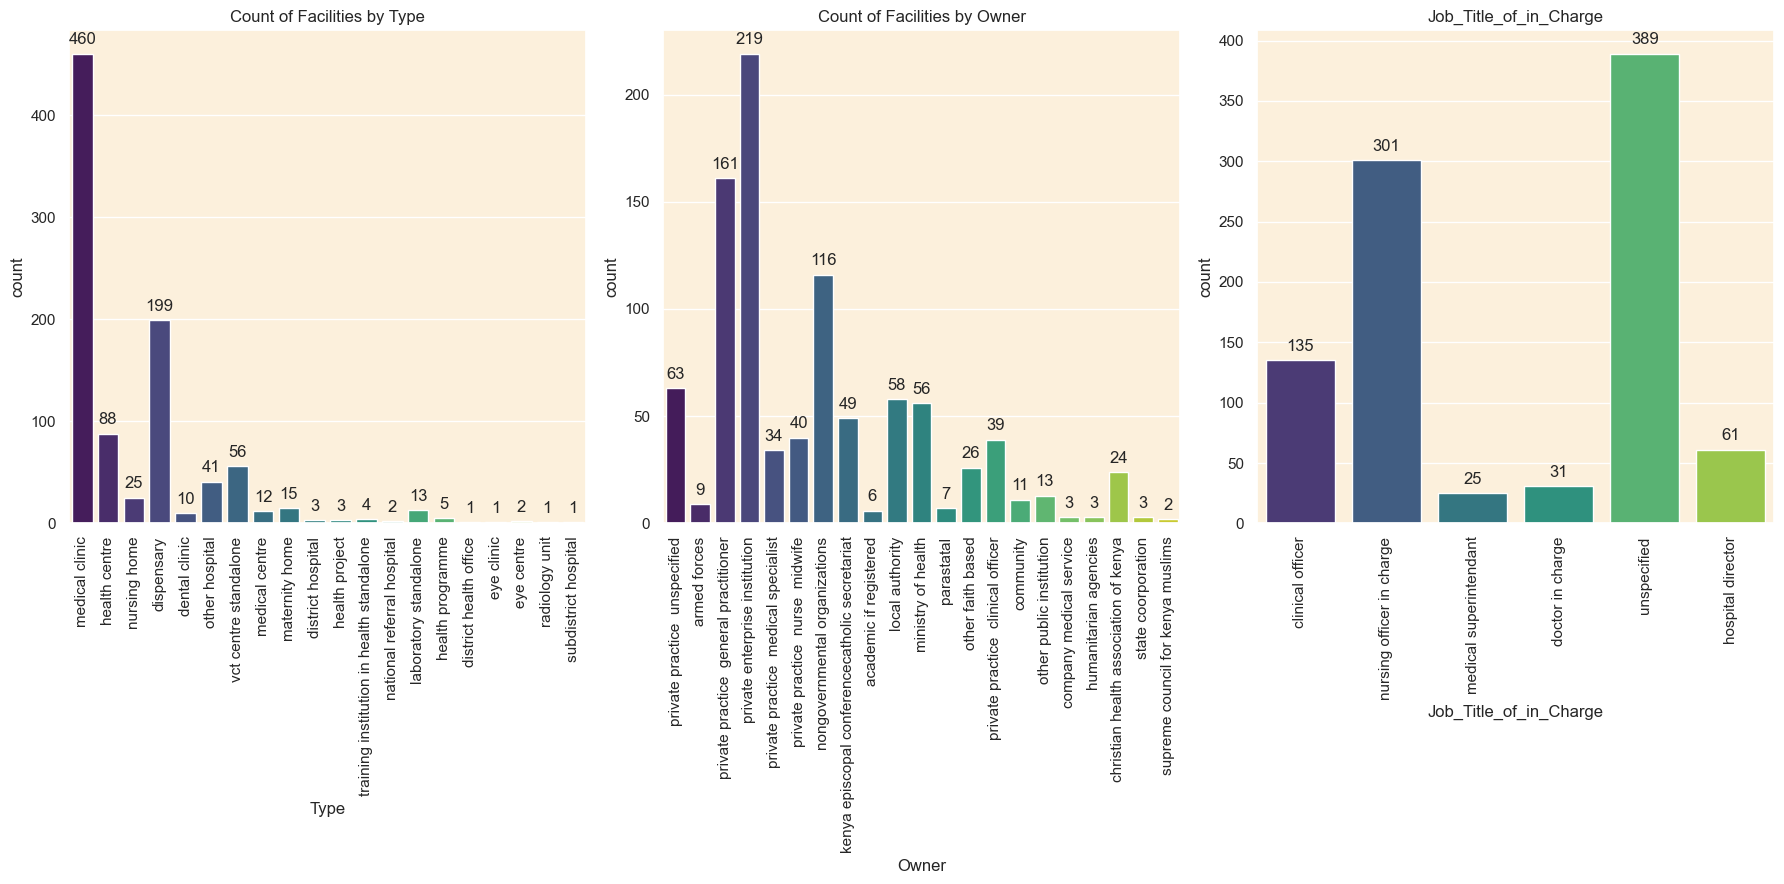

In [347]:

# Set up the matplotlib figure
plt.figure(figsize=(18, 9)) 

def add_labels(ax):
    """Add labels on the top of each bar in countplot."""
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Text to display
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                     ha = 'center',  # Center horizontally
                     va = 'center',  # Center vertically
                     xytext = (0, 10),  # Distance from the bar
                     textcoords = 'offset points')

# Create a countplot for 'Type'
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
ax1 =sns.countplot(data=Nbo_health_df, x='Type', palette='viridis')
plt.title('Count of Facilities by Type')
plt.xticks(rotation=90)
add_labels(ax1)

# Create a countplot for 'Owner'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
ax2 =sns.countplot(data=Nbo_health_df, x='Owner', palette='viridis')
plt.title('Count of Facilities by Owner')
plt.xticks(rotation=90)
add_labels(ax2)

# Create a countplot for 'Job_Title_of_in_Charge'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
ax3 =sns.countplot(data=Nbo_health_df, x='Job_Title_of_in_Charge', palette='viridis')
plt.title('Job_Title_of_in_Charge')
plt.xticks(rotation=90)
add_labels(ax3)

# Display the plots
plt.tight_layout()
plt.show()


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

1. **Facilities by Type**:
   - Medical clinics are the most common type of healthcare facility, making up the majority.
   - Dispensaries and health centers also have significant numbers, suggesting an emphasis on primary care.
   - Specialized facilities such as eye clinics, diagnostic centers, and standalone VCT (voluntary counseling and testing) centers are the least common.

2. **Facilities by Owner**:
   - Government ownership dominates the healthcare landscape, with private practice general practitioners also having a strong presence.
   - Faith-based organizations contribute notably to healthcare provision.
   - There are minimal facilities owned by private companies, suggesting that healthcare is largely a public or individual practitioner endeavor.

3. **Job Title of In-Charge**:
   - The highest number of facilities is overseen by Nursing officers, indicating their pivotal role in healthcare delivery.
   - Clinical officers in charge make up the second-largest group, highlighting the importance of nursing leadership.



<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Resource Distribution (Bed and Cots)</font></h2>

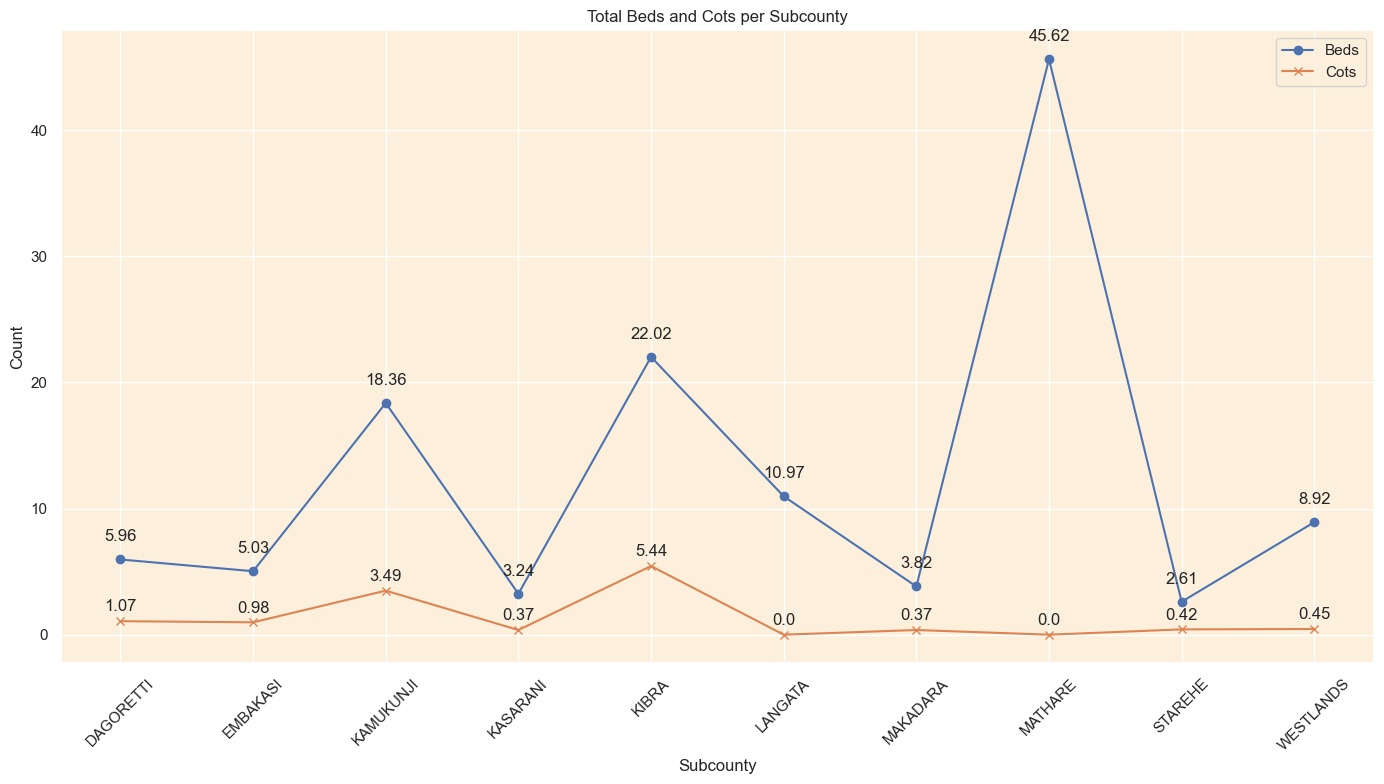

In [382]:
# Using Matplotlib to create a line graph
plt.figure(figsize=(14, 8))

# Plotting 'Beds' as a line graph
plt.plot(res_data_merged['Subcounty'], res_data_merged['Beds'], marker='o', label='Beds')
for i, txt in enumerate(res_data_merged['Beds']):
    plt.annotate(txt, (res_data_merged['Subcounty'][i], res_data_merged['Beds'][i]), textcoords="offset points", xytext=(0,13), ha='center')

# Plotting 'Cots' as a line graph
plt.plot(res_data_merged['Subcounty'], res_data_merged['Cots'], marker='x', label='Cots')
for i, txt in enumerate(res_data_merged['Cots']):
    plt.annotate(txt, (res_data_merged['Subcounty'][i], res_data_merged['Cots'][i]), textcoords="offset points", xytext=(0,7), ha='center')
    
# Enhancing the plot
plt.title('Total Beds and Cots per Subcounty')
plt.xlabel('Subcounty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>


1. **Average Beds per Facility**: 
   - 'Mathare' has the highest average number of beds per healthcare facility, indicating it might be a primary location for treating a large patient base or dealing with more severe health issues that require hospitalization.
   
2. **Average Cots per Facility**: 
   - Cots, which may represent pediatric or maternity care beds, are significantly fewer on average across all subcounties. The highest average is in 'Kibra', which could suggest a relative focus on childcare or maternity services in this area compared to others.
   
3. **Distribution Variability**: 
   - The variability in the mean counts of beds and cots across subcounties might indicate differing healthcare priorities or population demographics. For instance, areas with higher average beds may cater to a larger adult population, whereas those with higher cots could be more focused on child and maternal health.
   
4. **Zero Cots in Some Areas**: 
   - Subcounties like 'Langata' and 'Mathare' showing a mean of zero cots raises questions about the availability of specialized care for children and pregnant women in these regions.

5. **Resource Allocation Insight**: 
   - The uneven distribution of mean beds and cots across subcounties suggests that healthcare resource allocation might not be aligned with potential needs, especially for pediatric and maternity care, which may require further investigation and potentially targeted interventions.

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Resource Allocation per Land Area</font></h2>

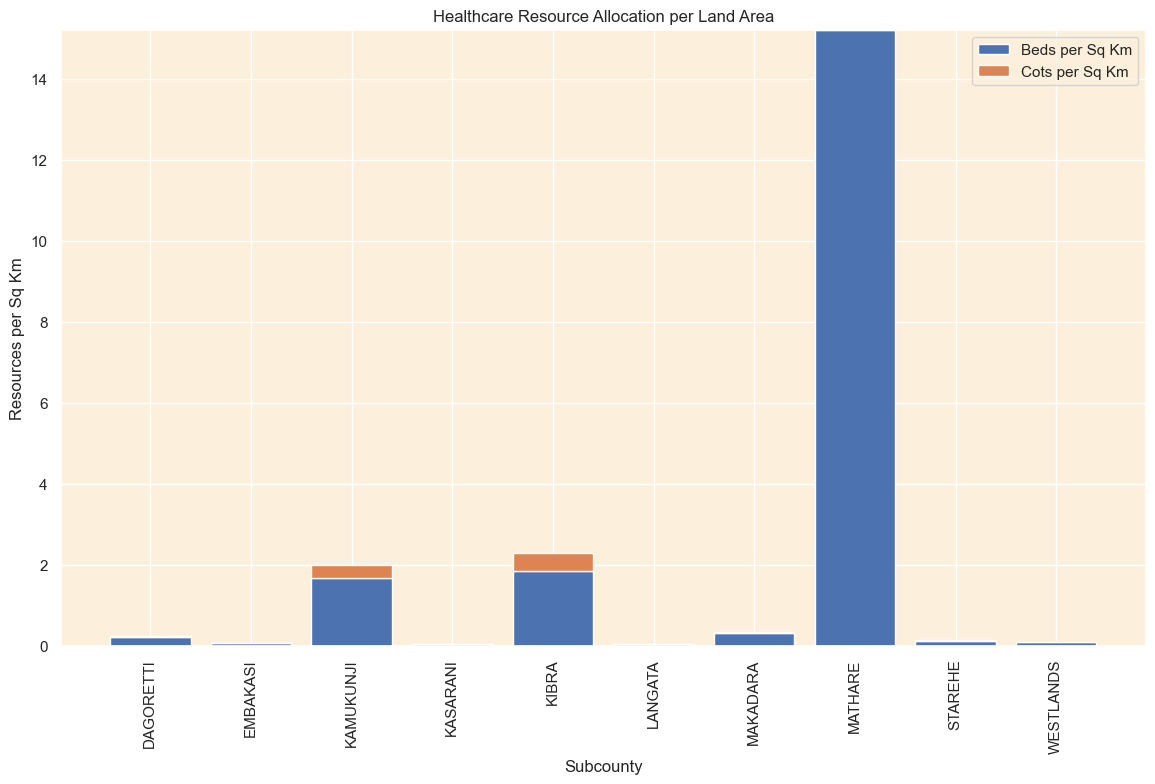

In [427]:
res_data_merged['Beds_per_Sq_Km'] = res_data_merged['Beds'] / res_data_merged['Land_Area_Sq._Km']
res_data_merged['Cots_per_Sq_Km'] = res_data_merged['Cots'] / res_data_merged['Land_Area_Sq._Km']
plt.figure(figsize=(14, 8))
plt.bar(res_data_merged['Subcounty'], res_data_merged['Beds_per_Sq_Km'], label='Beds per Sq Km')
plt.bar(res_data_merged['Subcounty'], res_data_merged['Cots_per_Sq_Km'], label='Cots per Sq Km', bottom=res_data_merged['Beds_per_Sq_Km'])
plt.title('Healthcare Resource Allocation per Land Area')
plt.xlabel('Subcounty')
plt.ylabel('Resources per Sq Km')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

1. **Uneven Distribution**:
   - There's a stark contrast in the number of beds per square kilometer among the subcounties, with Mathare standing out significantly. This could indicate a concentration of large healthcare facilities within a smaller area or a high hospital bed density.

2. **Resource Allocation per Area**:
   - The distribution of cots (likely for children and infants) is much lower across all subcounties. Kibra shows a higher allocation of cots per square kilometer, though not as pronounced as the allocation of beds.

3. **Resource Discrepancy**:
   - Subcounties like Langata, Makadara, and Westlands have a relatively lower allocation of both beds and cots per square kilometer, which might point towards a lower healthcare infrastructure density or the presence of smaller healthcare facilities.

4. **Potential Overcrowding**:
   - High bed density in Mathare might lead to overcrowding, which could impact the quality of healthcare if the patient-to-bed ratio is too high.

5. **Potential Service Gaps**:
   - The negligible number of cots per square kilometer in most subcounties suggests a potential gap in healthcare services for children and infants. It highlights a need for more focused maternal and pediatric care facilities.

6. **Infrastructure Planning**:
   - Policymakers and healthcare planners might need to consider these disparities in resource allocation per land area to improve healthcare access and quality across all subcounties, especially where the population density is high, but healthcare resources per land area are low.

<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Beds and Cots per Subcounty against Population size</font></h2>

In [395]:
res_data1 = Nbo_health_df.copy()

res_data1 = geo_data[geo_data['Operational_Status']== 'operational']

# convert the yes and no's to 1 and 0

res_data1 =  res_data1.replace('y', 1)
res_data1 =  res_data1.replace('n', 0)
res_data1['Open_24_Hours'] =  res_data1['Open_24_Hours'].replace('unspecified', 0)
res_data1['Open_Weekends'] =  res_data1['Open_Weekends'].replace('unspecified', 0)



# convert to int

res_data1['Open_24_Hours']=  res_data1['Open_24_Hours'].astype(int)
res_data1['Open_Weekends']=  res_data1['Open_Weekends'].astype(int)

# Dictionary of words to be replaced with an empty string

directions_to_remove = {" north": "", " south": "", " east": "", " west": "", " central": ""}

res_data1['Constituency'] = res_data1['Constituency'].replace(directions_to_remove, regex=True)

# group data by Constituency and other aggregate functions

res_data_grouped1 = res_data1.groupby('Constituency').agg({'Beds': 'sum','Cots': 'sum','Open_24_Hours': 'sum' ,'Open_Weekends' :'sum'}).reset_index()

res_data_grouped1 = res_data_grouped1.round(2)


# Dictionary of words to be replaced with an empty string

directions_to_remove = {" north": "", " south": "", " east": "", " west": "", " central": ""}

res_data_grouped1['Constituency'] = res_data_grouped1['Constituency'].replace(directions_to_remove, regex=True)

# changing to upper , stripping unnecessary spaces and changing column name

res_data_grouped1['Constituency']= res_data_grouped1['Constituency'].str.upper()

res_data_grouped1['Constituency']= res_data_grouped1['Constituency'].str.strip()

res_data_grouped1.rename(columns={"Constituency" : "Subcounty"}, inplace= True)


# Merging the dataset 

res_data_merged1 = pd.merge(res_data_grouped1, population, on='Subcounty', how='inner')

res_data_merged1

,Subcounty,Beds,Cots,Open_24_Hours,Open_Weekends,Total,Male,Female,HouseHolds_Total,Households_Conventional,Group_quarters,Land_Area_Sq._Km,Persons_Per_Sq._Km
0,DAGORETTI,626.0,112.0,20,50,434208,217651,216526,155089,154949,140.0,29,14908
1,EMBAKASI,729.0,142.0,54,95,988808,492476,496270,347955,346462,1493.0,86,11460
2,KAMUKUNJI,1083.0,206.0,18,34,268276,136670,131599,84365,83680,685.0,11,25455
3,KASARANI,217.0,25.0,9,37,780656,381234,399385,271290,268611,2679.0,86,9063
4,KIBRA,1784.0,441.0,13,42,185777,94199,91569,61690,61651,39.0,12,15311
5,LANGATA,746.0,0.0,14,40,197489,96698,100774,62239,60187,2052.0,217,911
6,MAKADARA,195.0,19.0,14,30,189536,96369,93157,70361,70080,281.0,12,16150
7,MATHARE,730.0,0.0,3,9,206564,106522,100028,74967,74967,1221.2,3,68940
8,STAREHE,357.0,58.0,10,60,210423,109173,101238,69389,66108,3281.0,21,10205
9,WESTLANDS,633.0,32.0,27,45,308854,153818,155021,104980,103489,1491.0,98,3167


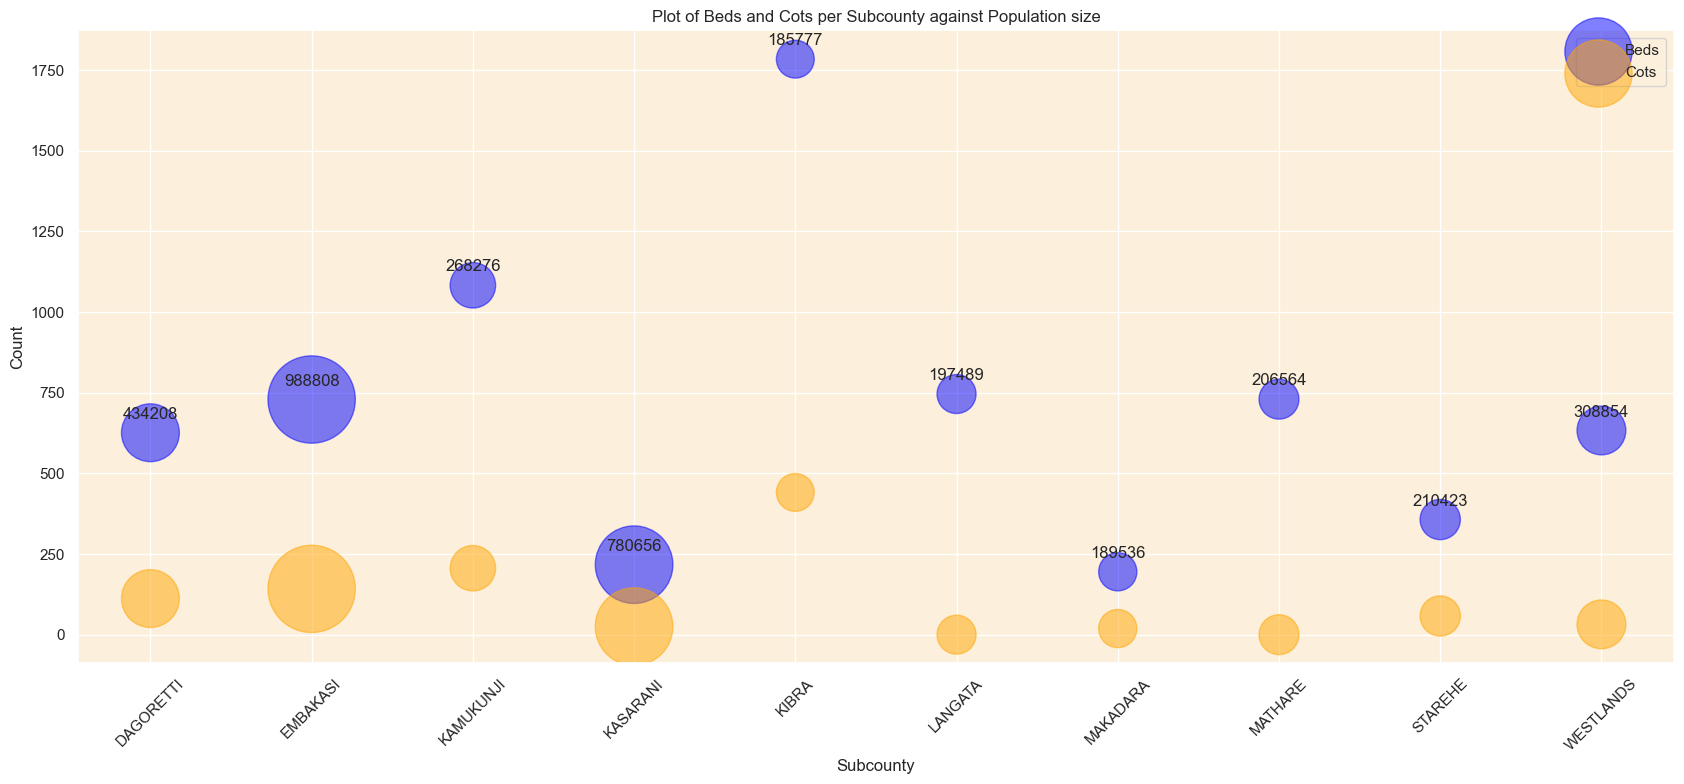

In [413]:
# Since we're adding annotations for population size, I will modify the code to include text annotations on the plot.

# Create the bubble plot with annotations for population size
plt.figure(figsize=(17, 8))

# I will use the total population as the size of the bubble to show the number of beds and cots.
# I will need to normalize the size of the bubbles so they are not too big or too small.
# I will use a scaling factor to adjust the sizes visually.

scaling_factor = 0.004
bubble_sizes_beds = res_data_merged1['Total'] * scaling_factor
bubble_sizes_cots = res_data_merged1['Total'] * scaling_factor

# Plotting the beds bubble plot
beds_scatter = plt.scatter('Subcounty', 'Beds', s=bubble_sizes_beds, alpha=0.5, data=res_data_merged1, label='Beds', color='blue')

# Plotting the cots bubble plot
cots_scatter = plt.scatter('Subcounty', 'Cots', s=bubble_sizes_cots, alpha=0.5, data=res_data_merged1, label='Cots', color='orange')

# Annotating the bubbles with population size
for i in range(len(res_data_merged1)):
    plt.annotate(f"{res_data_merged1['Total'][i]}", 
                 (res_data_merged1['Subcounty'][i], res_data_merged1['Beds'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.title('Plot of Beds and Cots per Subcounty against Population size')
plt.xlabel('Subcounty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>


1. **Resource vs. Population Proportionality**:
   - Although Kibra has the highest number of beds, its bubble size isn't the largest, indicating that while it has substantial healthcare resources, they may be proportional to its population size. 

2. **Potential Resource Strain**:
   - Embakasi has a large bubble (large population), but its bed count does not appear to be as high as Kibra's, suggesting that the healthcare resources in Embakasi may be under more strain relative to its population.

3. **Cots Allocation**:
   - Subcounties with larger populations, like Embakasi and Kasarani, have larger bubbles and relatively higher cots counts, but the proportion of cots to population size still appears low. This suggests a potential gap in pediatric and maternity care facilities relative to the needs of larger populations.

4. **Comparative Analysis**:
   - Comparatively, Kamukunji has a smaller population bubble but a high count of beds, which could indicate a better bed-to-population ratio.

5. **Population-Dense Areas with Fewer Resources**:
   - Subcounties like Langata and Mathare have mid-sized population bubbles but lower bed counts, which may indicate a disparity in resource allocation compared to other subcounties with similar population sizes.

6. **Potential Over-Resource Allocation**:
   - Starehe, despite having a relatively smaller population bubble, has a high count of beds. This might suggest an over-allocation of resources relative to its population size or a concentration of specialty care facilities.



<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:70%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Availability</font></h2>

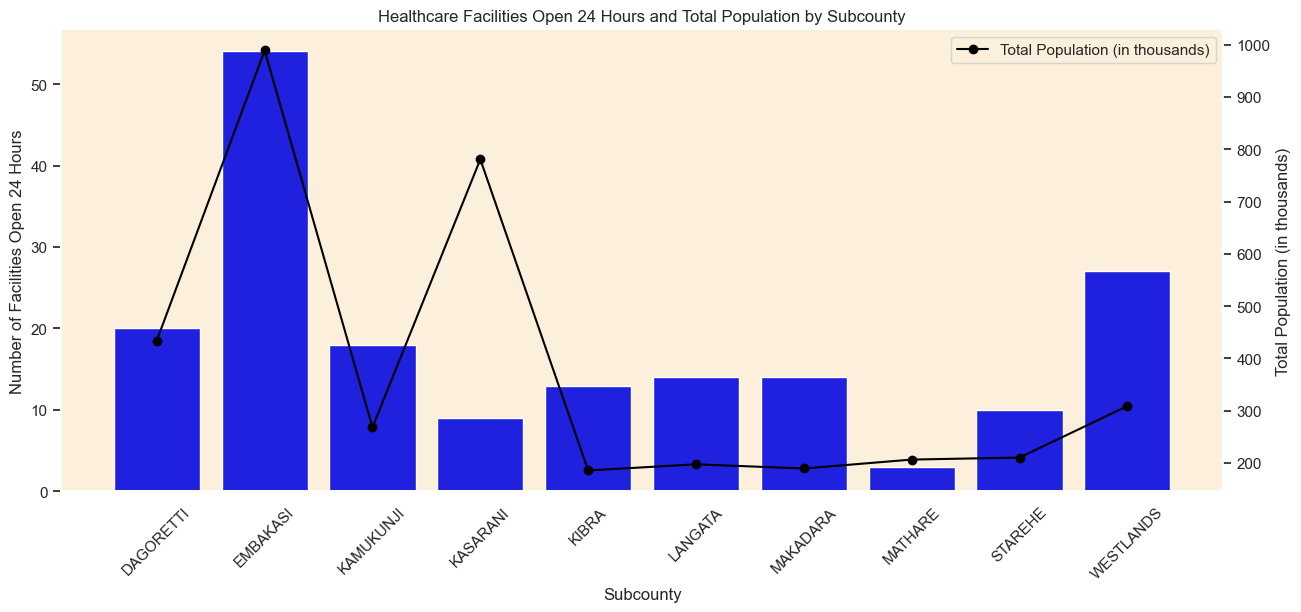

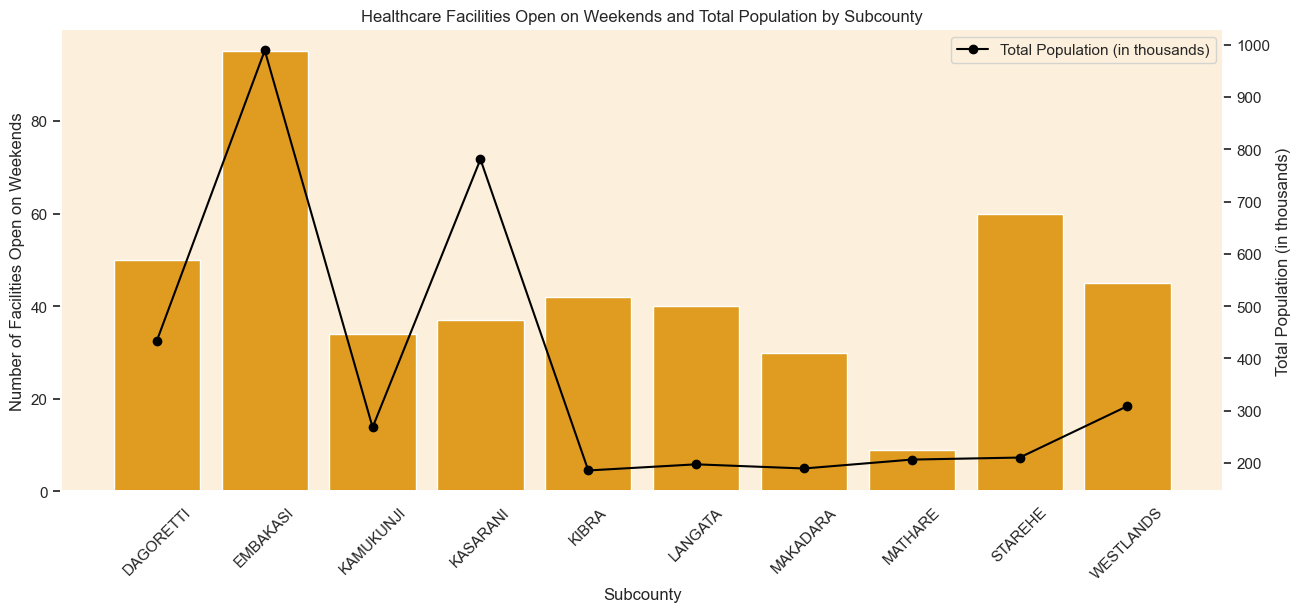

In [424]:
# Creating a combined plot with bar plots for resource availability and a line graph for total population.

fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for Open 24 Hours
sns.barplot(data=res_data_merged1, x='Subcounty', y='Open_24_Hours', color='blue', label='Open 24 Hours', ax=ax1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)
ax1.grid(False)

# Line graph for Total population, scaled down for better visualization
ax2.plot(res_data_merged1['Subcounty'], res_data_merged1['Total'] / 1000, color='black', label='Total Population (in thousands)', marker='o')
ax2.set_ylabel('Total Population (in thousands)')

# Title and labels
ax1.set_title('Healthcare Facilities Open 24 Hours and Total Population by Subcounty')
ax1.set_xlabel('Subcounty')
ax1.set_ylabel('Number of Facilities Open 24 Hours')
ax1.set_xticklabels(res_data_merged1['Subcounty'], rotation=45)
ax2.legend(loc='upper right')

plt.show()

# Creating another combined plot with bar plots for Open Weekends and a line graph for total population.

fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for Open Weekends
sns.barplot(data=res_data_merged1, x='Subcounty', y='Open_Weekends', color='orange', label='Open Weekends', ax=ax1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Line graph for Total population, scaled down for better visualization
ax2.plot(res_data_merged1['Subcounty'], res_data_merged1['Total'] / 1000, color='black', label='Total Population (in thousands)', marker='o')
ax2.set_ylabel('Total Population (in thousands)')

# Title and labels
ax1.set_title('Healthcare Facilities Open on Weekends and Total Population by Subcounty')
ax1.set_xlabel('Subcounty')
ax1.set_ylabel('Number of Facilities Open on Weekends')
ax1.set_xticklabels(res_data_merged1['Subcounty'], rotation=45)
ax2.legend(loc='upper right')
# Setting the grid parameter to False to remove gridlines
ax2.grid(False)
ax1.grid(False)
plt.show()


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>


1. **24-Hour Availability**:
   - Embakasi has the highest number of facilities operating 24 hours, followed by Westlands, indicating robust healthcare accessibility around the clock in these areas.

2. **Weekend Availability**:
   - The number of facilities open on weekends is highest in Embakasi, suggesting that it is the most accessible subcounty for healthcare during weekends. This is followed by Starehe and Kamukunji.

3. **Comparison Between 24-Hour and Weekend Services**:
   - Most subcounties have more facilities open on weekends compared to 24/7, which could indicate that while not all facilities operate round the clock, there is an emphasis on weekend service provision.

4. **Resource Allocation for Continuous Care**:
   - The data might reflect a prioritization for continuous healthcare service in urban or densely populated areas. The lower numbers in other subcounties could signify a need for improved healthcare infrastructure to ensure round-the-clock access.

5. **Potential Service Gaps**:
   - Subcounties like Mathare, despite having a substantial number of beds, show limited availability of 24-hour facilities, which could indicate a gap in continuous care services.



<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Open_24_Hours Availability Hypothesis test</font></h2>


**Hypothesis Statement:**

- Null Hypothesis (H0): There is no correlation between the total population of a subcounty and the number of healthcare facilities open 24 hours.
- Alternative Hypothesis (H1): There is a correlation between the total population of a subcounty and the number of healthcare facilities open 24 hours.

**Choice of Test:**

- The Pearson correlation coefficient test will be used because we are interested in determining the strength and direction of the linear relationship between two continuous variables: total population and the number of facilities open 24 hours.



In [435]:
# Calculate the Pearson correlation coefficient and the p-value.
correlation_coef, p_value = stats.pearsonr(res_data_merged1['Total'], res_data_merged1['Open_24_Hours'])

# An if statement to interpret the hypothesis test result
if p_value < 0.05:
    print(f"Reject the null hypothesis, there is a correlation. (r = {correlation_coef}, p = {p_value})")
else:
    print(f"Fail to reject the null hypothesis, there is no significant correlation. (r = {correlation_coef}, p = {p_value})")


Reject the null hypothesis, there is a correlation. (r = 0.672050900689407, p = 0.03328456672956512)


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

The Pearson correlation coefficient test result indicates:

- A significant positive correlation exists between the total population and the number of healthcare facilities open 24 hours (r = 0.6725, p = 0.033).
  
1. **Significant Positive Correlation**: The positive correlation coefficient suggests that as the population size of a subcounty increases, so does the number of healthcare facilities open 24 hours. This is indicative of a potential response by the healthcare system to provide more round-the-clock services in more populous areas.

2. **Statistical Significance**: Since the p-value is less than 0.05, the results are statistically significant, providing enough evidence to reject the null hypothesis and accept the alternative hypothesis.

3. **Healthcare Planning**: This correlation could be considered by healthcare planners and policymakers when deciding where to allocate resources for 24-hour healthcare facilities. It suggests a strategy that already aligns with population size, although causation cannot be established with this test alone.

4. **Resource Allocation**: The strength of the correlation (r = 0.6725) is moderate, indicating that while population size seems to be associated with 24-hour facility availability, there could be other factors at play that also affect this relationship. These factors could include urbanization levels, health policies, or the presence of other healthcare options that are not open 24 hours.



<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Bed against Population Availability Hypothesis test</font></h2>


### Beds:
**Null Hypothesis (H0)**: There is no correlation between the total population of a subcounty and the number of beds in the healthcare facilities.

**Alternative Hypothesis (H1)**: There is a correlation between the total population of a subcounty and the number of beds in the healthcare facilities.

**Choice of Test**: 
The Pearson correlation coefficient test will be used because it is designed to test for a linear relationship between two continuous variables.



In [433]:
# Perform Pearson correlation test for Beds vs. Total Population
corr_beds, p_value_beds = stats.pearsonr(res_data_merged1['Total'], res_data_merged1['Beds'])


if p_value_beds < 0.05:
    print(f"Reject the null hypothesis for Beds, there is a significant correlation with the total population. (r = {corr_beds}, p = {p_value_beds})")
else:
    print(f"Fail to reject the null hypothesis for Beds, there is no significant correlation with the total population.(r = {corr_beds}, p = {p_value_beds})")



Fail to reject the null hypothesis for Beds, there is no significant correlation with the total population.(r = -0.24352001560420938, p = 0.49778199645441845)


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Healthcare Cot against Population Availability Hypothesis test</font></h2>

### Cots:
**Null Hypothesis (H0)**: There is no correlation between the total population of a subcounty and the number of cots in the healthcare facilities.

**Alternative Hypothesis (H1)**: There is a correlation between the total population of a subcounty and the number of cots in the healthcare facilities.

**Choice of Test**: 
The Pearson correlation coefficient test will be used for the same reasons as above.


In [434]:
# Perform Pearson correlation test for Beds vs. Total Population
corr_cots, p_value_cots = stats.pearsonr(res_data_merged1['Total'], res_data_merged1['Cots'])


if p_value_beds < 0.05:
    print(f"Reject the null hypothesis for Cots, there is a significant correlation with the total population. (r = {corr_cots}, p = {p_value_cots})")
else:
    print(f"Fail to reject the null hypothesis for Cots, there is no significant correlation with the total population.(r = {corr_cots}, p = {p_value_cots})")

Fail to reject the null hypothesis for Cots, there is no significant correlation with the total population.(r = -0.054207661762045806, p = 0.8817685676628151)


<div style="border-radius:15px; padding: 15px; background-color: #025E7; font-size:90%; text-align:LEFT; width: 90%;">

<h2 align="left"><font color=#F28888>Observation </font></h2>

1. **No Correlation with Population for Beds**: The negative correlation coefficient (r = -0.24) for beds and total population suggests a very weak inverse relationship, meaning that as the population size increases, there is a slight tendency for the number of beds to decrease. However, the high p-value (p = 0.50) indicates that this weak negative relationship is not statistically significant, and we cannot conclude that a true relationship exists in the population from which the sample was drawn.

2. **No Correlation with Population for Cots**: Similarly, the correlation coefficient for cots and population size is also negative (r = -0.05), but it is even weaker than for beds. The very high p-value (p = 0.88) strongly suggests that there is no meaningful statistical relationship between the number of cots and the total population size.

3. **Resource Allocation Independent of Population Size**: Since we cannot reject the null hypothesis in both cases, the data does not provide evidence to suggest that the allocation of beds or cots in healthcare facilities is directly influenced by the size of the population in those subcounties.

4. **Consideration of Other Factors**: The lack of significant correlation could mean that other factors, perhaps administrative policies, geographic accessibility, or the presence of specialized medical institutions, might be influencing the allocation of healthcare resources rather than the population size alone.

5. **Planning and Policy Implications**: For healthcare system planners and policymakers, these insights imply that population size might not be the driving factor in the allocation of healthcare resources. It may prompt a review of how healthcare needs are assessed and resources are distributed to ensure equitable and effective healthcare coverage.


<a id="Wrap up"></a>
# <p style="background-color: #F28888; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:30px 50px;">Step 5 | Insights, Conclusion and Recommendations</p>

<a id="Key_Insights"></a>
### <h2><span style='color:#fcc36d'>Step 5.1 |</span><span style='color:#F28888'>Key Insights</span></h2>


1. **Mathare's Resource Concentration**:
   - Mathare's high facility density juxtaposed with its population size suggests a centralized healthcare approach, which might be beneficial for acute care but risks overwhelming services due to potential overcrowding.

2. **Embakasi's Accessibility versus Strain**:
   - Despite having the largest population, Embakasi doesn't have the highest count of beds or cots, raising concerns about healthcare strain. However, it leads in the number of facilities open 24/7, suggesting efforts to enhance healthcare accessibility.

3. **Kibra's Pediatric Care**:
   - Kibra exhibits a relative focus on childcare or maternity services, as indicated by its cot allocation, yet this does not scale with its population, which could signify a service gap in pediatric care.

4. **Langata and Westlands – Potential for Enhanced Access**:
   - Both Langata and Westlands, with moderate healthcare resource allocation, may be better positioned to absorb population growth without immediate strain but should plan for expanding services.

5. **Starehe's Anomalous Provision**:
   - Starehe shows a disproportionate resource allocation with a higher number of beds relative to its population size, hinting at a potential over-allocation or the presence of specialized healthcare facilities.


<a id="Conclusion"></a>
### <h2><span style='color:#fcc36d'>Step 5.2 |</span><span style='color:#F28888'>Conclusion</span></h2>

- There is no uniform strategy in healthcare resource distribution across Nairobi’s subcounties, with some areas exhibiting potential over or under-allocation.
- Population size is not the sole determinant of healthcare resource allocation, which could indicate a need to re-evaluate the existing healthcare planning strategy.
- The relationship between population density and the number of healthcare facilities suggests disparities that may hinder the achievement of SDG 3 in Nairobi.



<a id="Recommendations"></a>
### <h2><span style='color:#fcc36d'>Step 5.3 |</span><span style='color:#F28888'>Recommendations</span></h2>

1. **Resource Re-evaluation**:
   - Re-assess the healthcare resource allocation in subcounties like Embakasi and Langata to ensure facilities can accommodate current and projected demands without sacrificing service quality.

2. **Specialized Care Expansion**:
   - Invest in expanding specialized care, particularly pediatric and maternity services in subcounties such as Kibra, to bridge the service gaps indicated by the disproportionate cot-to-population ratio.

3. **Infrastructure Planning**:
   - Implement targeted infrastructure development in densely populated subcounties to prevent service strain, prioritizing areas with low facility-to-population density ratios.

4. **Demographic-Driven Allocation**:
   - Develop and apply a demographic-driven allocation model that factors in population size, density, and health profiles to guide the distribution of healthcare resources more effectively.

By addressing these recommendations, Kenya can progress toward achieving SDG 3 by ensuring equitable healthcare access and enhancing the well-being for all residents across Nairobi's diverse socio-demographic landscape.